In [102]:
import matplotlib.pyplot as plt
import numpy as np



def gaussian(info=None,x=None,train=False):
    if info==None:
        coeff=1
        mean=0
        variance=1
    else:
        coeff=info["coeff"]
        mean=info["mean"]
        variance=info["variance"]
#         print(coeff)
    if train==True:
        coeff=1
    if x==None:
        x=np.random.rand()
    y=coeff*np.exp(-(x-mean)**2/(2*variance))
    return y


In [106]:
x=[]
y=[]
n=1000
start=-20
end=10
info1={"coeff":0.3,"mean":-10,"variance":1}
info2={"coeff":0.7,"mean":-5,"variance":2}
info3={"coeff":0.9,"mean":-5,"variance":0.5}
info4={"coeff":0.1,"mean":-2,"variance":8}
# for i in range(n):
# #     x.append(np.random.rand()*np.random.randint(-10,10))
#     x.append(i*(end-start)/n+start)
#     y.append(gaussian(info1,x[-1])+gaussian(info2,x[-1]))
# plt.plot(x,y)

In [183]:
def plotter(graphs,x,estm=None):
    y=[]
    for i in x:
        sum=0
        for num,key in enumerate(graphs.keys()):
            if estm!=None:
                graphs[key]["coeff"]=estm[num]
            sum+=gaussian(graphs[key],i)
        y.append(sum)
    return y

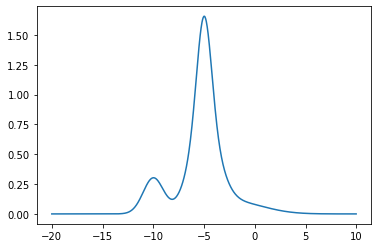

In [244]:
graphs={"1":info1,"2":info2,"3":info3,"4":info4}
x=[]
for i in range(n):
    x.append(i*(end-start)/n+start)

y=plotter(graphs,x)
plt.plot(x,y)

In [248]:
train_x=[]
train_y=[]
for i in range(4):
    index=np.random.randint(0,len(x)-1)
    train_x.append(x[index])
    train_y.append(y[index])
train_data_x=[]
for t_x in train_x:
    temp=[]
    for key in graphs.keys():
        temp.append(gaussian(graphs[key],t_x,True))
    train_data_x.append(temp)
train_data_y=train_y
# plt.scatter(train_x,train_y)

In [249]:
from sklearn.linear_model import LinearRegression
train_data_x=np.array(train_data_x)
train_data_y=np.array(train_data_y)
reg = LinearRegression()
reg.fit(train_data_x, train_data_y)
# reg.score(X, y)
print(reg.coef_)



[3.00000000e-01 7.00000152e-01 1.18224532e-07 1.00000000e-01]


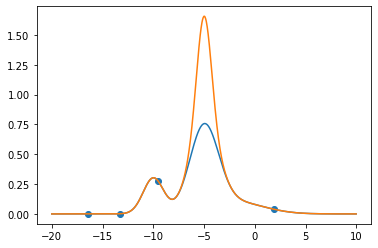

In [250]:
y_new=plotter(graphs,x,list(reg.coef_))
plt.plot(x,y_new)
plt.plot(x,y)
plt.scatter(train_x,train_y)

## Results

* **orange** - true distribution
* **blue** - predicted distribution


4 distributions, with only 10 data point or buckets => **high resolution data**

![image](.\high_res.jpg)

* predicted coefficients = [0.3 0.7 0.9 0.1]
* expected coefficients = [0.3 0.7 0.9 0.1]


4 distributions, with only 4 data point or buckets => **low resolution data**

![image](.\low_res.jpg)
* predicted coefficients = [3.00000000e-01 7.00000152e-01 1.18224532e-07 1.00000000e-01]
* expected coefficients = [0.3 0.7 0.9 0.1]
